# Edit Your Expectation Suite
Use this notebook to recreate and modify your expectation suite:

**Expectation Suite Name**: `first_data.csv.warning`


In [2]:
!pip install great_expectations

In [3]:
import datetime

import pandas as pd

import great_expectations as ge
import great_expectations.jupyter_ux
from great_expectations.core.batch import BatchRequest
from great_expectations.checkpoint import SimpleCheckpoint
from great_expectations.exceptions import DataContextError

context = ge.data_context.DataContext()

# Note that if you modify this batch request, you may save the new version as a .json file
#  to pass in later via the --batch-request option
batch_request = {'datasource_name': 'first_data', 'data_connector_name': 'default_inferred_data_connector_name', 'data_asset_name': 'first_data.csv', 'limit': 1000}


# Feel free to change the name of your suite here. Renaming this will not remove the other one.
expectation_suite_name = "first_data.csv.warning"
try:
    suite = context.get_expectation_suite(expectation_suite_name=expectation_suite_name)
    print(f'Loaded ExpectationSuite "{suite.expectation_suite_name}" containing {len(suite.expectations)} expectations.')
except DataContextError:
    suite = context.create_expectation_suite(expectation_suite_name=expectation_suite_name)
    print(f'Created ExpectationSuite "{suite.expectation_suite_name}".')


validator = context.get_validator(
    batch_request=BatchRequest(**batch_request),
    expectation_suite_name=expectation_suite_name
)
column_names = [f'"{column_name}"' for column_name in validator.columns()]
print(f"Columns: {', '.join(column_names)}.")
validator.head(n_rows=5, fetch_all=False)

2021-10-07T20:16:27+0000 - INFO - Great Expectations logging enabled at 20 level by JupyterUX module.
/root/venv/lib/python3.7/site-packages/great_expectations/jupyter_ux/__init__.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)
Loaded ExpectationSuite "first_data.csv.warning" containing 65 expectations.
Columns: "Unnamed: 0", "Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Ad Topic Line", "City", "Male", "Country", "Timestamp", "Clicked on Ad".


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,Jamesville,0,Portugal,2016-01-01 02:52:10,0
1,1,68.01,25,68357.96,188.32,Ameliorated actuating workforce,Kaylashire,1,Afghanistan,2016-01-01 03:35:35,0
2,2,80.94,36,60803.00,239.94,Self-enabling local strategy,North Tiffany,0,Bermuda,2016-01-01 05:31:22,0
3,3,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,Gomezport,0,Guam,2016-01-01 08:27:06,0
4,4,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,West Ryan,0,Uganda,2016-01-01 15:14:24,1


## Create & Edit Expectations


Add expectations by calling specific expectation methods on the `validator` object. They all begin with `.expect_` which makes autocompleting easy using tab.

Because you selected interactive mode, you are now creating or editing an Expectation Suite with validator feedback from the sample batch of data that you specified (see `batch_request`).

Note that if you select manual mode you may still create or edit an Expectation Suite directly, without feedback from the `validator`. See our documentation for more info and examples: [How to create a new Expectation Suite without a sample batch](https://docs.greatexpectations.io/en/latest/guides/how_to_guides/creating_and_editing_expectations/how_to_create_a_new_expectation_suite_without_a_sample_batch.html).



You can see all the available expectations in the **[expectation glossary](https://docs.greatexpectations.io/en/latest/reference/glossary_of_expectations.html?utm_source=notebook&utm_medium=create_expectations)**.

### Table Expectation(s)

In [4]:
validator.expect_table_columns_to_match_ordered_list(column_list=['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad'])

{
  "success": true,
  "result": {
    "observed_value": [
      "Unnamed: 0",
      "Daily Time Spent on Site",
      "Age",
      "Area Income",
      "Daily Internet Usage",
      "Ad Topic Line",
      "City",
      "Male",
      "Country",
      "Timestamp",
      "Clicked on Ad"
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### Column Expectation(s)

#### `Daily Time Spent on Site`

In [5]:
validator.active_batch.data.dataframe['Daily Time Spent on Site'].describe()

count    610.000000
mean     65.267049 
std      15.852992 
min      32.600000 
25%      51.515000 
50%      68.330000 
75%      78.525000 
max      91.370000 
Name: Daily Time Spent on Site, dtype: float64

<AxesSubplot:ylabel='Frequency'>

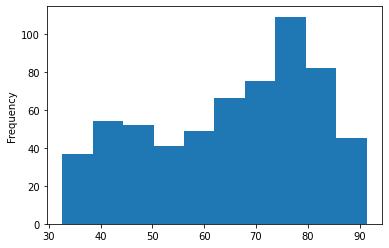

In [6]:
validator.active_batch.data.dataframe['Daily Time Spent on Site'].plot.hist()

In [7]:

validator.expect_column_min_to_be_between(column='Daily Time Spent on Site', max_value=40, min_value=30)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 32.6
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [8]:

validator.expect_column_max_to_be_between(column='Daily Time Spent on Site', max_value=100, min_value=85)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 91.37
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [9]:

validator.expect_column_mean_to_be_between(column='Daily Time Spent on Site', max_value=70, min_value=55)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 65.26704918032787
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [10]:

validator.expect_column_values_to_not_be_null(column='Daily Time Spent on Site')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [11]:

validator.expect_column_values_to_be_in_type_list(column='Daily Time Spent on Site', type_list=['FLOAT', 'FLOAT4', 'FLOAT8', 'FLOAT64', 'DOUBLE', 'DOUBLE_PRECISION', 'NUMERIC', 'FloatType', 'DoubleType', 'float_', 'float16', 'float32', 'float64', 'number', 'DECIMAL', 'REAL'])

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Age`

In [12]:
validator.active_batch.data.dataframe['Age'].describe()

count    610.000000
mean     36.050820 
std      8.918296  
min      19.000000 
25%      29.000000 
50%      35.000000 
75%      42.000000 
max      61.000000 
Name: Age, dtype: float64

In [13]:

validator.expect_column_min_to_be_between(column='Age', max_value=12, min_value=10)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": false,
  "result": {
    "observed_value": 19
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [14]:

validator.expect_column_max_to_be_between(column='Age', max_value=70, min_value=57)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 61
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [15]:

validator.expect_column_mean_to_be_between(column='Age', max_value=40, min_value=30)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 36.05081967213115
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [16]:

validator.expect_column_values_to_not_be_null(column='Age')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [17]:

validator.expect_column_values_to_be_in_type_list(column='Age', type_list=['INTEGER', 'integer', 'int', 'int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'INT', 'INTEGER', 'INT64', 'TINYINT', 'BYTEINT', 'SMALLINT', 'BIGINT', 'IntegerType', 'LongType'])

{
  "success": true,
  "result": {
    "observed_value": "int64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Area Income`

In [18]:
validator.active_batch.data.dataframe['Area Income'].describe()

count    610.000000  
mean     55365.620951
std      12992.334779
min      14548.060000
25%      47688.815000
50%      57532.600000
75%      65101.792500
max      79484.800000
Name: Area Income, dtype: float64

In [19]:

validator.expect_column_min_to_be_between(column='Area Income', max_value=15000, min_value=12000)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 14548.06
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [20]:

validator.expect_column_max_to_be_between(column='Area Income', max_value=80000, min_value=70000)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 79484.8
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [21]:

validator.expect_column_mean_to_be_between(column='Area Income', max_value=65000, min_value=55000)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 55365.62095081966
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [22]:

validator.expect_column_values_to_not_be_null(column='Area Income')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [23]:

validator.expect_column_values_to_be_in_type_list(column='Area Income', type_list=['FLOAT', 'FLOAT4', 'FLOAT8', 'FLOAT64', 'DOUBLE', 'DOUBLE_PRECISION', 'NUMERIC', 'FloatType', 'DoubleType', 'float_', 'float16', 'float32', 'float64', 'number', 'DECIMAL', 'REAL'])

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Daily Internet Usage`

In [24]:
 
validator.expect_column_min_to_be_between(column='Daily Internet Usage', max_value=110, min_value=95)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 105.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [25]:

validator.expect_column_max_to_be_between(column='Daily Internet Usage', max_value=270, min_value=250)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 269.96
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [26]:

validator.expect_column_mean_to_be_between(column='Daily Internet Usage', max_value=185, min_value=170)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 179.4397868852459
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [27]:

validator.expect_column_values_to_not_be_null(column='Daily Internet Usage')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [28]:

validator.expect_column_values_to_be_in_type_list(column='Daily Internet Usage', type_list=['FLOAT', 'FLOAT4', 'FLOAT8', 'FLOAT64', 'DOUBLE', 'DOUBLE_PRECISION', 'NUMERIC', 'FloatType', 'DoubleType', 'float_', 'float16', 'float32', 'float64', 'number', 'DECIMAL', 'REAL'])

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Ad Topic Line`

In [29]:

validator.expect_column_values_to_not_be_null(column='Ad Topic Line')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [30]:

validator.expect_column_values_to_be_in_type_list(column='Ad Topic Line', type_list=['CHAR', 'NCHAR', 'VARCHAR', 'NVARCHAR', 'TEXT', 'NTEXT', 'STRING', 'StringType', 'string', 'str', 'object', "dtype('O')"])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `City`

In [31]:

validator.expect_column_values_to_not_be_null(column='City')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [32]:

validator.expect_column_proportion_of_unique_values_to_be_between(column='City', max_value=0.98, min_value=0.9)

Calculating Metrics:   0%|          | 0/7 [00:00<?, ?it/s]

{
  "success": false,
  "result": {
    "observed_value": 0.9819672131147541
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [33]:

validator.expect_column_values_to_be_in_type_list(column='City', type_list=['CHAR', 'NCHAR', 'VARCHAR', 'NVARCHAR', 'TEXT', 'NTEXT', 'STRING', 'StringType', 'string', 'str', 'object', "dtype('O')"])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Male`

In [34]:
validator.active_batch.data.dataframe['Male'].describe()

count    610.000000
mean     0.485246  
std      0.500192  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  
Name: Male, dtype: float64

In [35]:

validator.expect_column_values_to_be_in_set(column='Male', value_set=[0, 1])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [36]:
validator.expect_column_mean_to_be_between(column='Male', max_value=0.55, min_value=0.45)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 0.4852459016393443
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [37]:

validator.expect_column_values_to_not_be_null(column='Male')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [38]:

validator.expect_column_values_to_be_in_type_list(column='Male', type_list=['INTEGER', 'integer', 'int', 'int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'INT', 'INTEGER', 'INT64', 'TINYINT', 'BYTEINT', 'SMALLINT', 'BIGINT', 'IntegerType', 'LongType'])

{
  "success": true,
  "result": {
    "observed_value": "int64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Country`

In [39]:

validator.expect_column_values_to_not_be_null(column='Country')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [40]:

validator.expect_column_values_to_be_in_type_list(column='Country', type_list=['CHAR', 'NCHAR', 'VARCHAR', 'NVARCHAR', 'TEXT', 'NTEXT', 'STRING', 'StringType', 'string', 'str', 'object', "dtype('O')"])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Timestamp`

In [41]:

validator.expect_column_values_to_not_be_null(column='Timestamp')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [42]:

validator.expect_column_values_to_be_in_type_list(column='Timestamp', type_list=['CHAR', 'NCHAR', 'VARCHAR', 'NVARCHAR', 'TEXT', 'NTEXT', 'STRING', 'StringType', 'string', 'str', 'object', "dtype('O')"])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

#### `Clicked on Ad`

In [43]:

validator.expect_column_mean_to_be_between(column='Clicked on Ad', max_value=0.55, min_value=0.45)

Calculating Metrics:   0%|          | 0/3 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 0.4918032786885246
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [44]:

validator.expect_column_values_to_be_in_set(column='Clicked on Ad', value_set=[0, 1])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [45]:

validator.expect_column_values_to_not_be_null(column='Clicked on Ad')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 610,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [46]:

validator.expect_column_values_to_be_in_type_list(column='Clicked on Ad', type_list=['INTEGER', 'integer', 'int', 'int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'INT', 'INTEGER', 'INT64', 'TINYINT', 'BYTEINT', 'SMALLINT', 'BIGINT', 'IntegerType', 'LongType'])

{
  "success": true,
  "result": {
    "observed_value": "int64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

## Save & Review Your Expectations

Let's save the expectation suite as a JSON file in the `great_expectations/expectations` directory of your project.

Let's now rebuild your Data Docs, which helps you communicate about your data with both machines and humans.

In [47]:
print(validator.get_expectation_suite(discard_failed_expectations=False))
validator.save_expectation_suite(discard_failed_expectations=False)

checkpoint_config = {
    "class_name": "SimpleCheckpoint",
    "validations": [
        {
            "batch_request": batch_request,
            "expectation_suite_name": expectation_suite_name
        }
    ]
}
checkpoint = SimpleCheckpoint(
    f"_tmp_checkpoint_{expectation_suite_name}",
    context,
    **checkpoint_config
)
checkpoint_result = checkpoint.run()

context.build_data_docs()

validation_result_identifier = checkpoint_result.list_validation_result_identifiers()[0]
context.open_data_docs(resource_identifier=validation_result_identifier)

    },
    {
      "kwargs": {
        "column": "Daily Time Spent on Site",
        "max_value": 70,
        "min_value": 55
      },
      "meta": {},
      "ge_cloud_id": null,
      "expectation_type": "expect_column_mean_to_be_between"
    },
    {
      "kwargs": {
        "column": "Daily Time Spent on Site",
        "max_value": 68.33,
        "min_value": 68.33
      },
      "meta": {},
      "ge_cloud_id": null,
      "expectation_type": "expect_column_median_to_be_between"
    },
    {
      "kwargs": {
        "allow_relative_error": "lower",
        "column": "Daily Time Spent on Site",
        "quantile_ranges": {
          "quantiles": [
            0.05,
            0.25,
            0.5,
            0.75,
            0.95
          ],
          "value_ranges": [
            [
              37.47,
              37.47
            ],
            [
              51.5,
              51.5
            ],
            [
              68.25,
              68.25
            ],
 

Calculating Metrics:   0%|          | 0/104 [00:00<?, ?it/s]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>